In [1]:
import rescomp as rc
from scipy import integrate
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [10, 10]

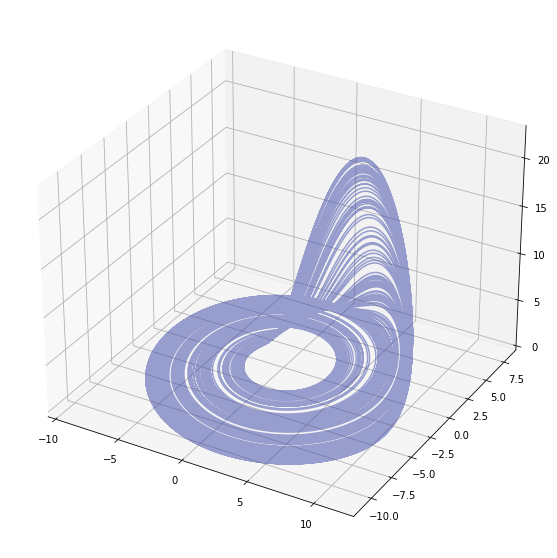

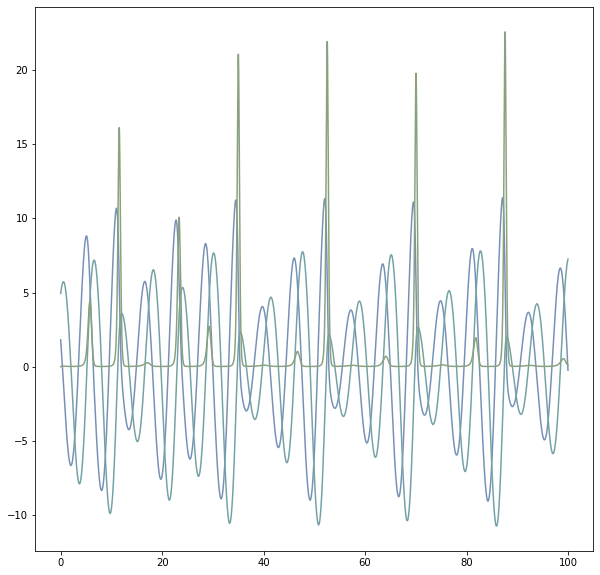

array([[0.46758238, 0.56708954, 0.7153727 ],
       [0.45172733, 0.63661495, 0.64828863],
       [0.5368813 , 0.63526465, 0.48932088]])

In [2]:
t, U = rc.orbit("rossler", duration=1000.0, dt=0.01)
rc.plot3d(U)
N = 10000
rc.plot2d(U[:N,:], t[:N])

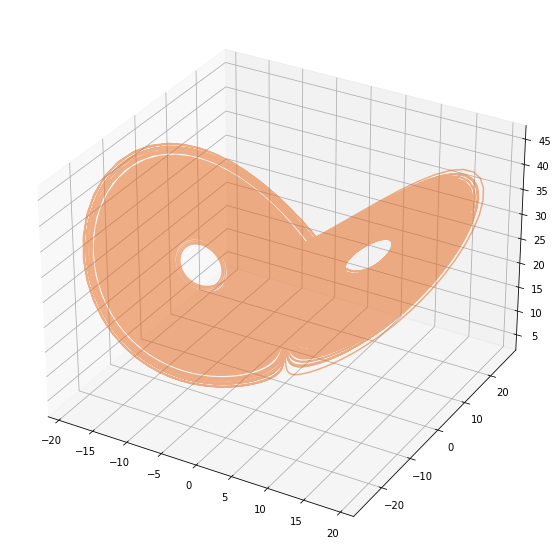

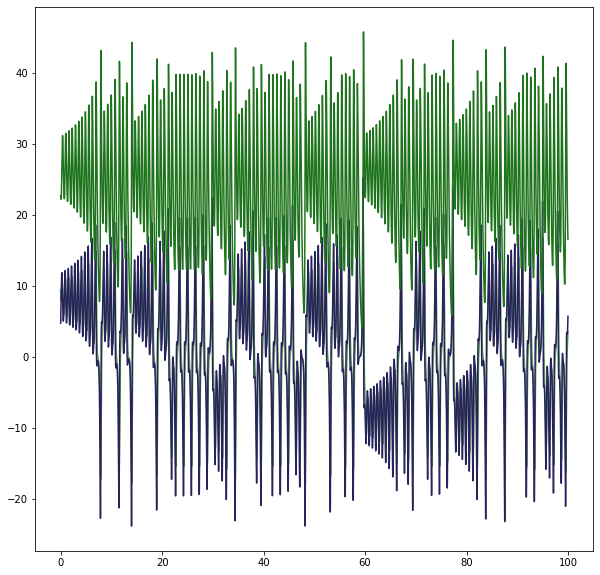

array([[0.37341689, 0.58825722, 0.32298642],
       [0.14912153, 0.14106304, 0.35878599],
       [0.11795235, 0.45617181, 0.10947304]])

In [3]:
t, U = rc.orbit("lorenz", duration=1000.0, dt=0.01)
rc.plot3d(U)
N = 10000
rc.plot2d(U[:N,:], t[:N])

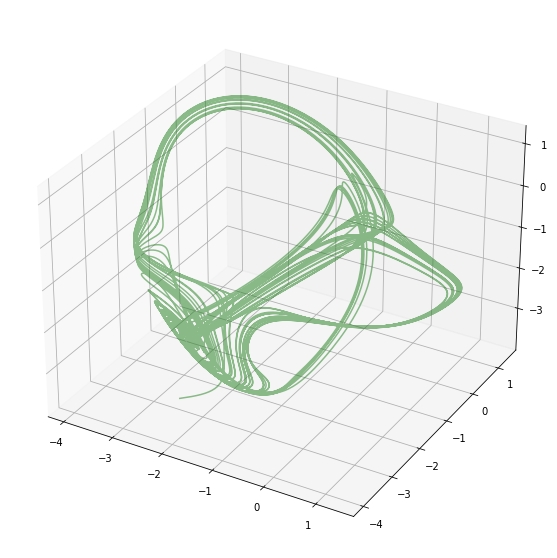

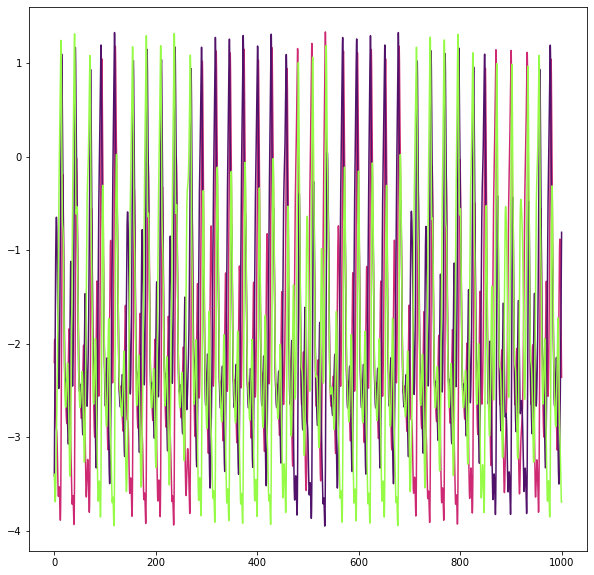

array([[0.80235438, 0.16532049, 0.44955077],
       [0.31622304, 0.069497  , 0.41714415],
       [0.58939404, 0.98626928, 0.28015598]])

In [4]:
t, U = rc.orbit("thomas", duration=1000.0, dt=0.1)
rc.plot3d(U)
N = 10000
rc.plot2d(U[:N,:], t[:N])

In [5]:
def random_lorenz_x0():
    """ Random initial condition for lorenz equations """
    return  20*(2*np.random.rand(3) - 1)

def lorenz_equ(x0=[-20, 10, -.5], begin=0, end=60, timesteps=60000, train_per=.66, clip=0):
    """Use solve_ivp to produce a solution to the lorenz equations"""
    t = np.linspace(begin,end,timesteps)
    clipped_start = floor(timesteps * clip / (end - begin))
    n_train = floor(clipped_start + train_per * (end - clip) / (end - begin) * timesteps)
    train_t = t[clipped_start:n_train]
    test_t = t[n_train:]
    u = integrate.solve_ivp(lorentz_deriv, (begin,end), x0, dense_output=True).sol
    return train_t, test_t, u

def plot3D(U, color=None):
    if color is None:
        color = np.random.rand(3)
    ax = plt.axes(projection='3d')
    x,y,z = U[0,:], U[1,:], U[2,:]
    ax.plot3D(x, y, z, c=color, alpha=0.8)
    ax.set_title = "3D Orbit"
    plt.show()
    return color

In [6]:
dt = 0.001
start = 0
end = 500
timesteps = int(end / dt) + 1
t = np.linspace(start, end, timesteps)
u0 = 40 * np.random.rand(3) - 20
U = integrate.odeint(rc.rossler, u0, t)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


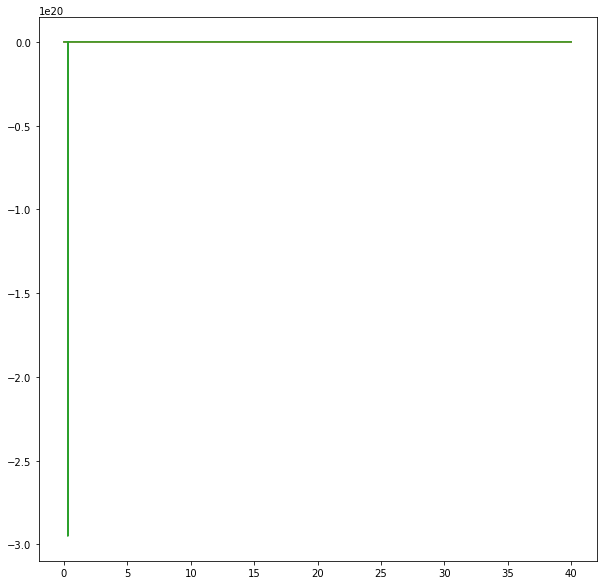

In [7]:
N = 40000
plt.plot(t[:N], U[:N, 0])
plt.plot(t[:N], U[:N, 1])
plt.plot(t[:N], U[:N, 2])